#### 3. Exploratory Data Analysis (EDA)

In [1]:
# 3.1 Import Required Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import LinearSegmentedColormap

In [2]:
# 3.2 Load the Dataset
encoding = 'latin1'
df = pd.read_csv(r'E:\Vocational\Lighthouse Labs\Flex Course\Projects\P06_Final Project\data\master.csv', encoding=encoding, low_memory=False)

In [4]:
# 3.3 Display the First Few Rows of the Dataset
df.head()

,caseId,labels,applicantName,applicantCount,litigationGuardian,decisionType,title,citation,decisionDate,ancestry,...,respondentCount,respondent,writtenSubmission,appearances,intervenor,appRep,resRep,adjudicatorCount,adjudicator,reasoning
0,2023hrto1,abandoned,Tracey Foster,single,False,DECISION,Foster v. City of Toronto,2023 HRTO 1 (CanLII),2023-01-03,False,...,NaN,City of Toronto,False,False,Not Applicable,Not Applicable,Not Applicable,single,Amanda Connolley,fil applition alleg violat human right code rs...
1,2023hrto2,abandoned,Mike Aube,single,False,DECISION,Aube v. Kirk,2023 HRTO 2 (CanLII),2023-01-04,False,...,NaN,David Kirk,False,False,Not Applicable,Not Applicable,Not Applicable,single,Joseph Tascona,fil applition alleg violat human right code rs...
2,2023hrto3,abuse of process,Youkhana Moshi,single,False,DECISION,Moshi v. Ontario (Solicitor General),2023 HRTO 3 (CanLII),2023-01-05,False,...,NaN,His Majesty the King in Right of Ontario as re...,False,False,Not Applicable,Not Applicable,Not Applicable,single,Mark Borer,early december sent several email quick succes...
3,2023hrto4,abandoned,Jessica Johnson,single,False,DECISION,Johnson v. Wilson,2023 HRTO 4 (CanLII),2023-01-05,False,...,NaN,Annie Wilson,False,False,Not Applicable,Not Applicable,Not Applicable,single,Amanda Connolley,fil applition alleg violat human right code rs...
4,2023hrto5,abandoned,Gregory Nash,single,False,DECISION,Nash v. Penske Logistics Canada Ltd.,2023 HRTO 5 (CanLII),2023-01-05,False,...,NaN,Penske Logistics Canada Ltd.,False,False,Not Applicable,Not Applicable,Not Applicable,single,David Langlois,fil applition alleg violat human right code rs...


In [5]:
# 3.4 Basic Information About the Dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1911 entries, 0 to 1910
Data columns (total 45 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   caseId              1911 non-null   object
 1   labels              1911 non-null   object
 2   applicantName       1911 non-null   object
 3   applicantCount      1911 non-null   object
 4   litigationGuardian  1911 non-null   bool  
 5   decisionType        1911 non-null   object
 6   title               1911 non-null   object
 7   citation            1911 non-null   object
 8   decisionDate        1911 non-null   object
 9   ancestry            1911 non-null   bool  
 10  age                 1911 non-null   bool  
 11  citizenship         1911 non-null   bool  
 12  colour              1911 non-null   bool  
 13  creed               1911 non-null   bool  
 14  disability          1911 non-null   bool  
 15  ethnic origin       1911 non-null   bool  
 16  family status       1911

In [6]:
# 3.5 Summary Statistics for the Dataset
df.describe(include='all')

,caseId,labels,applicantName,applicantCount,litigationGuardian,decisionType,title,citation,decisionDate,ancestry,...,respondentCount,respondent,writtenSubmission,appearances,intervenor,appRep,resRep,adjudicatorCount,adjudicator,reasoning
count,1911,1911,1911,1911,1911,1911,1911,1911,1911,1911,...,627,1911,1911,1911,1911,1911,1911,1911,1911,1911
unique,1911,17,1643,2,2,5,1786,1911,265,2,...,2,1623,2,2,3,7,6,2,44,1836
top,2023hrto1,abandoned,Olufemi Shodunke,single,False,DECISION,Talwar v. Grand River Hospital,2023 HRTO 1 (CanLII),2023-02-27,False,...,multiple,City of Toronto,False,False,Not Applicable,Not Applicable,Not Applicable,single,Robert Ciriello,fil applition alleg violat human right code rs...
freq,1,1197,17,1891,1844,1550,8,1,37,1825,...,526,19,1493,1674,1904,1675,1682,1910,166,7


In [7]:
# 3.6 Check for Missing Values
df.isnull().sum()

caseId                   0
labels                   0
applicantName            0
applicantCount           0
litigationGuardian       0
decisionType             0
title                    0
citation                 0
decisionDate             0
ancestry                 0
age                      0
citizenship              0
colour                   0
creed                    0
disability               0
ethnic origin            0
family status            0
gender expression        0
gender identity          0
marital status           0
place of origin          0
public assistance        0
race                     0
record of offences       0
sex                      0
sexual orientation       0
single status            0
accommodation            0
contracts                0
employment               0
goods                    0
services                 0
facilities               0
uniouns                  0
trades                   0
respondentCount       1284
respondent               0
w

In [8]:
# 3.7 Function to Plot Percentage Distribution of Labels (Excluding 'Abandoned')
def plot_percentage_distribution_exclude(df, column_name, exclude_value, title):
    """
    Plot the percentage distribution of values in the specified column, excluding a specific value.
    """
    plt.figure(figsize=(14, 8))
    total = len(df)
    
    # Calculate percentages
    value_counts = df[column_name].value_counts(normalize=True) * 100
    sorted_counts = value_counts.drop(exclude_value).sort_values(ascending=False)
    
    # Create a bar plot
    sns.barplot(x=sorted_counts.index, y=sorted_counts.values, palette="Spectral")
    
    # Add labels to bars
    for i, value in enumerate(sorted_counts.values):
        plt.text(i, value + 0.5, f'{value:.1f}%', ha='center', va='bottom', fontsize=14)
    
    # Title and labels
    plt.title(f'Distribution of {title} (Percentage)', fontsize=24)
    plt.ylabel('Percentage', fontsize=20)
    plt.xlabel(column_name.capitalize(), fontsize=20)
    
    # Rotate x-axis labels
    plt.xticks(rotation=45, ha='right', fontsize=14)
    plt.yticks(fontsize=14)
    
    # Show the plot
    plt.tight_layout()
    plt.show()

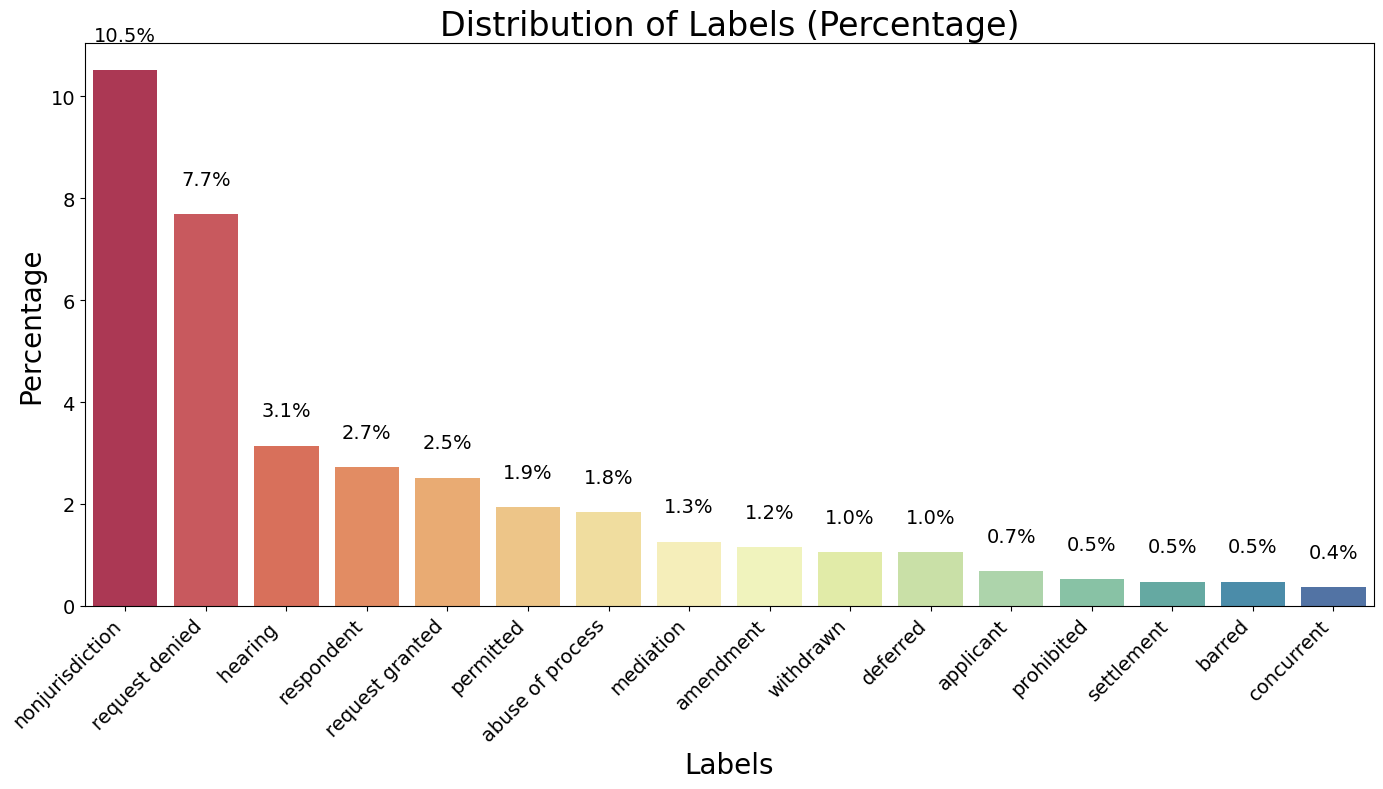

In [9]:
# 3.8 Plot Distribution of Labels (Excluding 'Abandoned')
plot_percentage_distribution_exclude(df, 'labels', 'abandoned', 'Labels')

# 3.9 Function to Plot Protected Grounds as Pie Chart with 'Others' Grouped
def plot_protected_grounds_pie_grouped(df, columns, other_columns, title):
    """
    Plot a pie chart showing the percentage of 'True' values for selected Boolean columns, grouping others.
    """
    plt.figure(figsize=(10, 10))
    total = len(df)
    
    # Calculate the percentage of 'True' values
    true_percentages_selected = [(df[col].sum() / total) * 100 for col in columns]
    others_percentage = sum([(df[col].sum() / total) * 100 for col in other_columns])
    
    sorted_columns = columns + ['others']
    sorted_percentages = true_percentages_selected + [others_percentage]
    
    # Create a pie chart
    wedges, texts, autotexts = plt.pie(sorted_percentages, labels=sorted_columns, autopct='%1.1f%%', 
                                       startangle=140, colors=sns.color_palette("viridis", len(sorted_columns)), textprops={'fontsize': 14})
    
    for autotext in autotexts:
        autotext.set_fontsize(14)
    
    for text in texts:
        text.set_fontsize(14)
    
    # Title
    plt.title(f'{title}', fontsize=20)
    plt.axis('equal')
    plt.tight_layout()
    plt.show()

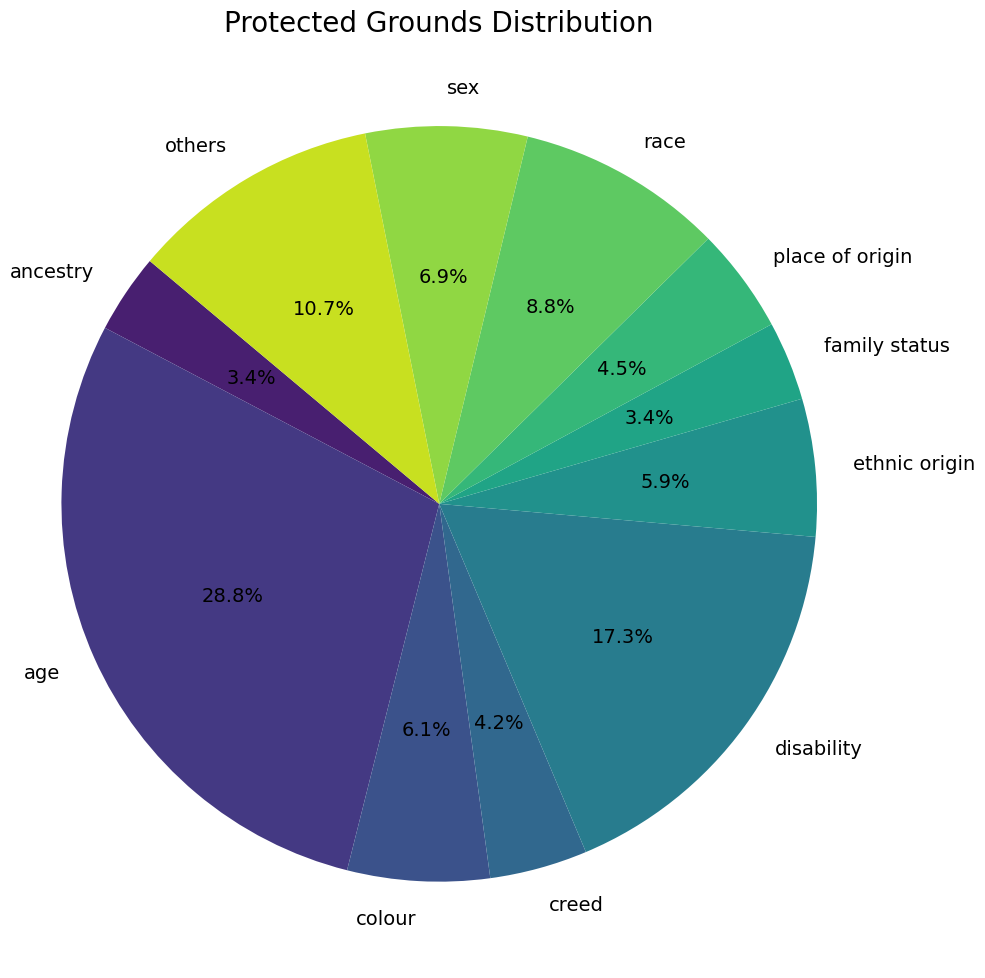

In [10]:
# 3.10 Plot Protected Grounds Distribution with 'Others' Grouped
protected_grounds_columns = ['ancestry', 'age', 'colour', 'creed', 'disability', 'ethnic origin', 
                             'family status', 'place of origin', 'race', 'sex']

other_protected_grounds_columns = ['citizenship', 'gender expression', 'gender identity', 'marital status', 
                                   'record of offences', 'sexual orientation', 'single status', 'public assistance']

plot_protected_grounds_pie_grouped(df, protected_grounds_columns, other_protected_grounds_columns, 'Protected Grounds Distribution')

In [11]:
# 3.11 Function to Plot Protected Areas as Pie Chart
def plot_protected_areas_pie(df, columns, title):
    """
    Plot a pie chart showing the percentage of 'True' values for selected Boolean columns.
    """
    plt.figure(figsize=(10, 10))
    total = len(df)
    
    true_percentages = [(df[col].sum() / total) * 100 for col in columns]
    
    sorted_indices = sorted(range(len(true_percentages)), key=lambda i: true_percentages[i], reverse=True)
    sorted_columns = [columns[i] for i in sorted_indices]
    sorted_percentages = [true_percentages[i] for i in sorted_indices]
    
    # Create pie chart
    wedges, texts, autotexts = plt.pie(sorted_percentages, labels=sorted_columns, autopct='%1.1f%%', 
                                       startangle=140, colors=sns.color_palette("viridis", len(sorted_columns)), textprops={'fontsize': 14})
    
    for autotext in autotexts:
        autotext.set_fontsize(14)
    
    for text in texts:
        text.set_fontsize(14)
    
    # Title
    plt.title(f'{title}', fontsize=20)
    plt.axis('equal')
    plt.tight_layout()
    plt.show()

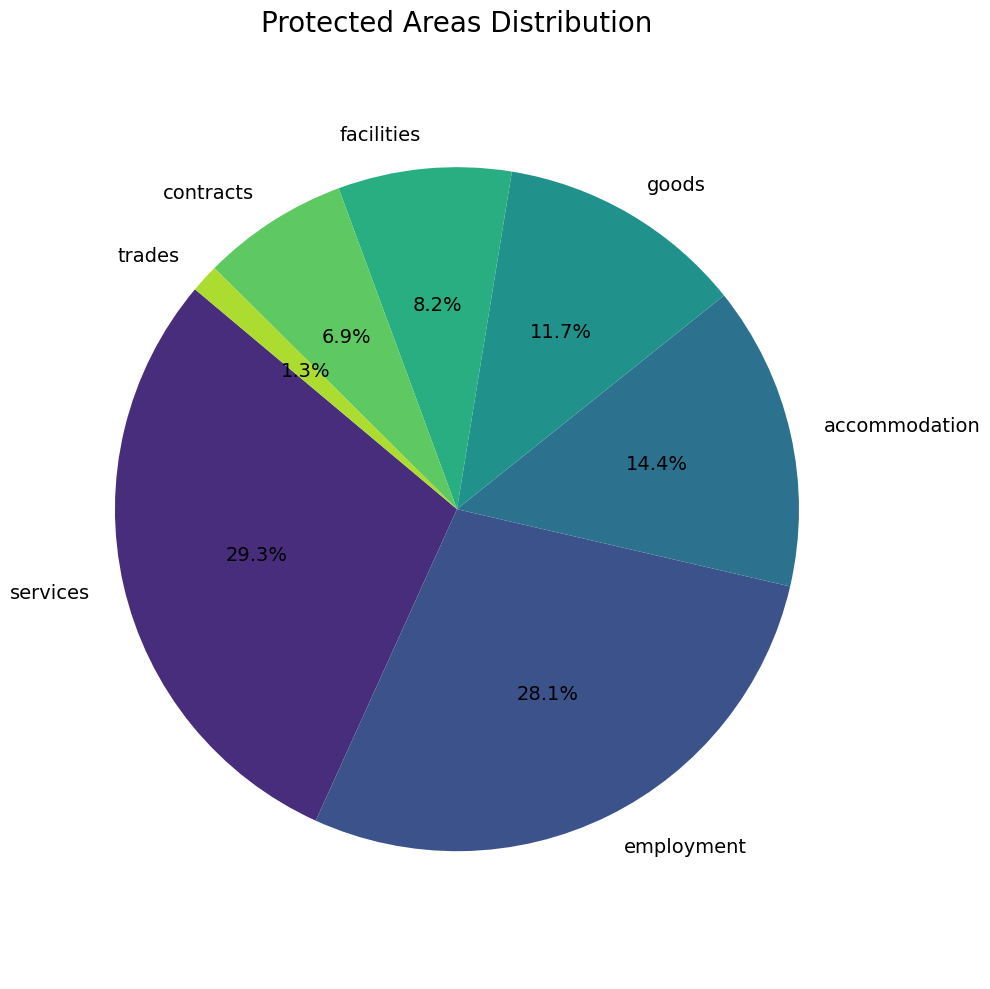

In [12]:
# 3.12 Plot Protected Areas Distribution as Pie Chart
protected_areas_columns = ['accommodation', 'contracts', 'employment', 'goods', 'services', 'facilities', 'trades']
plot_protected_areas_pie(df, protected_areas_columns, 'Protected Areas Distribution')

In [13]:
# 3.13 Create a Custom Blue Colormap for Heatmap
blue_cmap = LinearSegmentedColormap.from_list("custom_blue", ["#d1e6fa", "#084081"])

In [14]:
# 3.14 Function to Plot Heatmap for Protected Grounds and Areas Relationship
def plot_relationship_heatmap_combined(df, areas_combinations, grounds_combinations, title):
    """
    Plot the relationship between protected areas and grounds using a percentage heatmap.
    """
    heatmap_data = pd.DataFrame(0, index=areas_combinations.keys(), columns=grounds_combinations.keys())
    total_cases = len(df)
    
    # Calculate the percentage of cases where both area and ground are 'True'
    for area, area_cols in areas_combinations.items():
        for ground, ground_cols in grounds_combinations.items():
            combined_area = df[area_cols].any(axis=1)
            combined_ground = df[ground_cols].any(axis=1)
            count = df[combined_area & combined_ground].shape[0]
            heatmap_data.loc[area, ground] = (count / total_cases) * 100
    
    # Plot the heatmap
    plt.figure(figsize=(16, 12))
    sns.heatmap(heatmap_data, annot=False, cmap=blue_cmap, linewidths=.5)
    
    # Title and labels
    plt.title(title, fontsize=24)
    plt.xlabel('Protected Grounds', fontsize=24)
    plt.ylabel('Protected Areas', fontsize=24)
    
    plt.xticks(
        ticks=range(len(grounds_combinations)),
        labels=['Age', 'Ancestry,\nColour,\n& Race', 'Ethnic Origin\n& Place of Origin', 'Creed', 
                'Disability', 'Sex &\nSexual\nOrientation'],
        fontsize=16, rotation=45, ha="right"
    )
    
    plt.yticks(
        ticks=range(len(areas_combinations)),
        labels=['Goods,\nServices,\n& Facilities', 'Contracts', 'Employment', 'Accommodation'],
        fontsize=16, rotation=45, ha="right"
    )
    
    # Show the plot
    plt.tight_layout()
    plt.show()

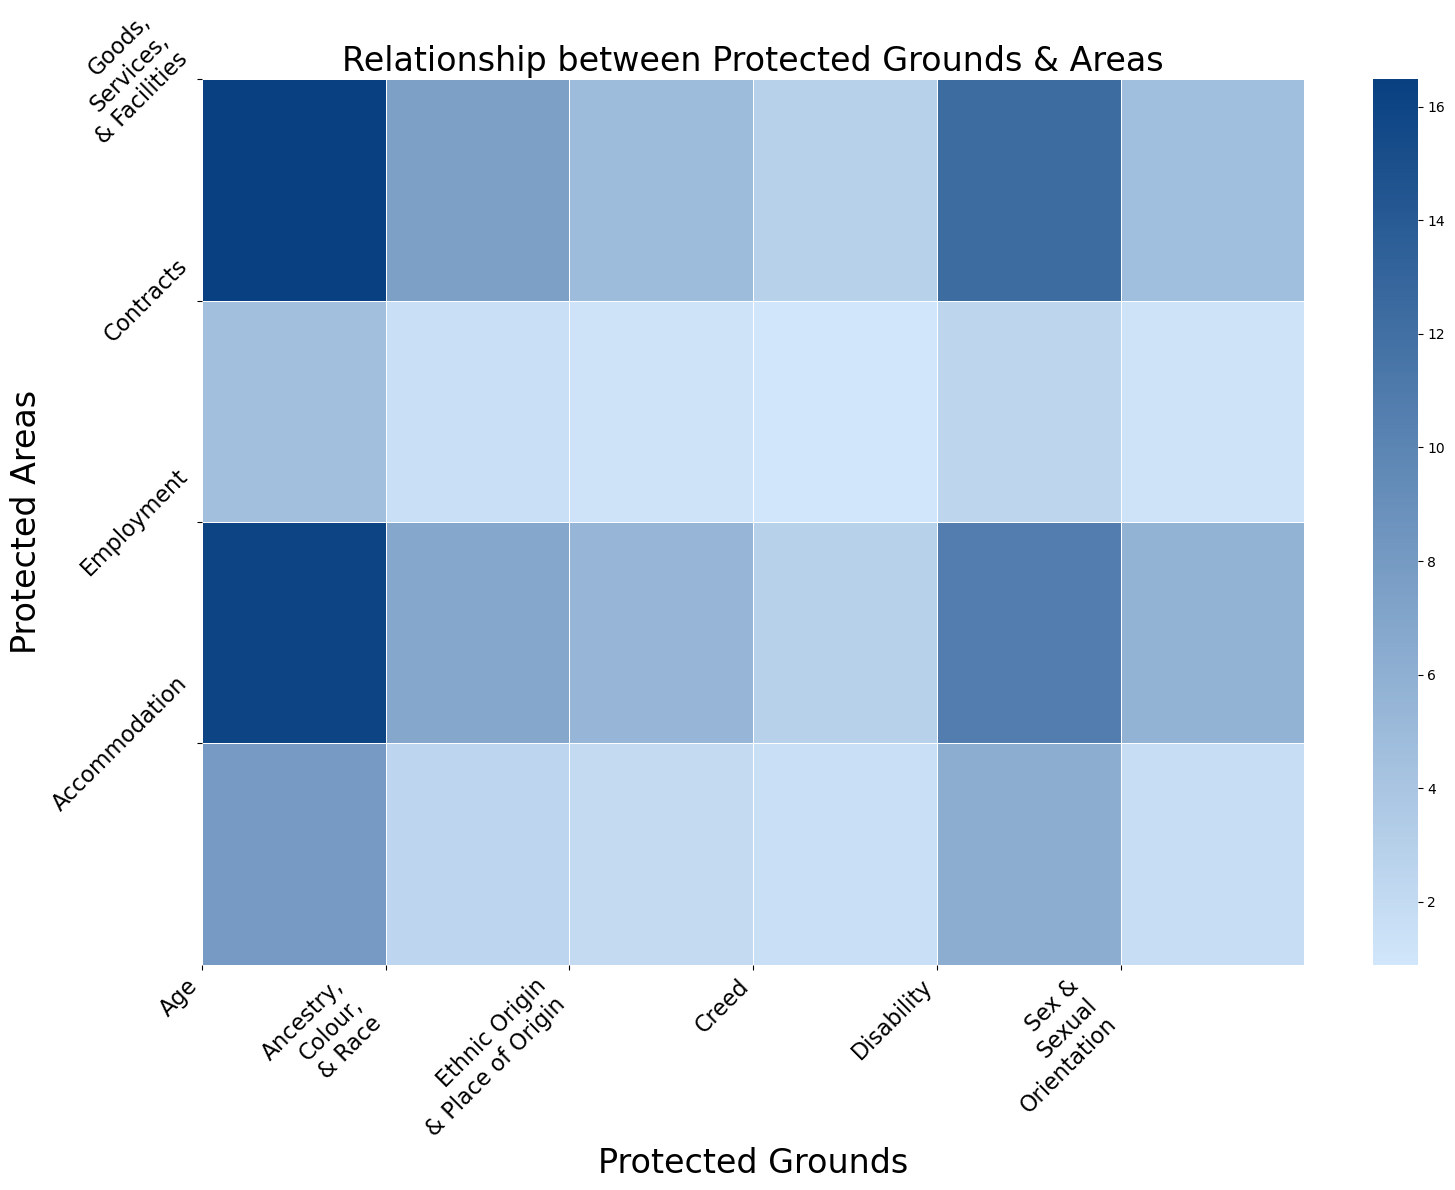

In [15]:
# 3.15 Plot Heatmap for the Relationship Between Protected Grounds and Areas
areas_combinations = {
    'Goods, Services & Facilities': ['goods', 'services', 'facilities'],
    'Contracts': ['contracts'],
    'Employment': ['employment'],
    'Accommodation': ['accommodation'],
}

grounds_combinations = {
    'Age': ['age'],
    'Ancestry, Colour & Race': ['ancestry', 'colour', 'race'],
    'Ethnic Origin & Place of Origin': ['ethnic origin', 'place of origin'],
    'Creed': ['creed'],
    'Disability': ['disability'],
    'Sex & Sexual Orientation': ['sex', 'sexual orientation']
}

plot_relationship_heatmap_combined(df, areas_combinations, grounds_combinations, 'Relationship between Protected Grounds & Areas')

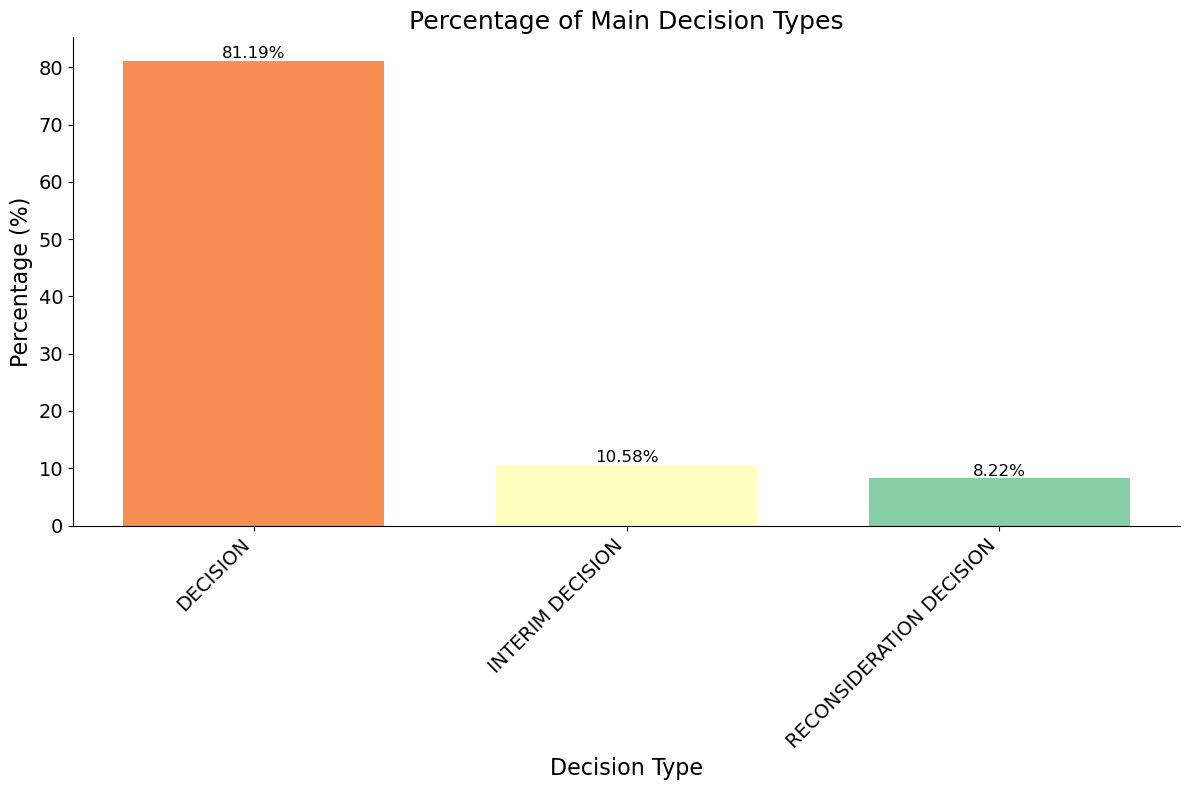

In [16]:
# 3.16 Plot Percentage of Main Decision Types
# Define the color palette for consistency
colors = sns.color_palette("Spectral", 3)

# Filter the dataset to include only main decision types
main_decision_types = ['DECISION', 'INTERIM DECISION', 'RECONSIDERATION DECISION']
df_filtered = df[df['decisionType'].isin(main_decision_types)]

# Calculate the percentage of each decision type
decision_counts = df_filtered['decisionType'].value_counts(normalize=True) * 100

# Plot a bar chart
fig, ax = plt.subplots(figsize=(12, 8))
bars = plt.bar(decision_counts.index, decision_counts, color=colors, edgecolor='none', width=0.7)

# Enhancements
plt.title('Percentage of Main Decision Types', fontsize=18)
plt.xlabel('Decision Type', fontsize=16)
plt.ylabel('Percentage (%)', fontsize=16)
plt.xticks(rotation=45, ha='right', fontsize=14)
plt.yticks(fontsize=14)

# Labeling the percentages on top of the bars
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2.0, height + 0.5, f'{height:.2f}%', ha='center', fontsize=12)

# Remove spines
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Adjust layout
plt.tight_layout()
plt.show()

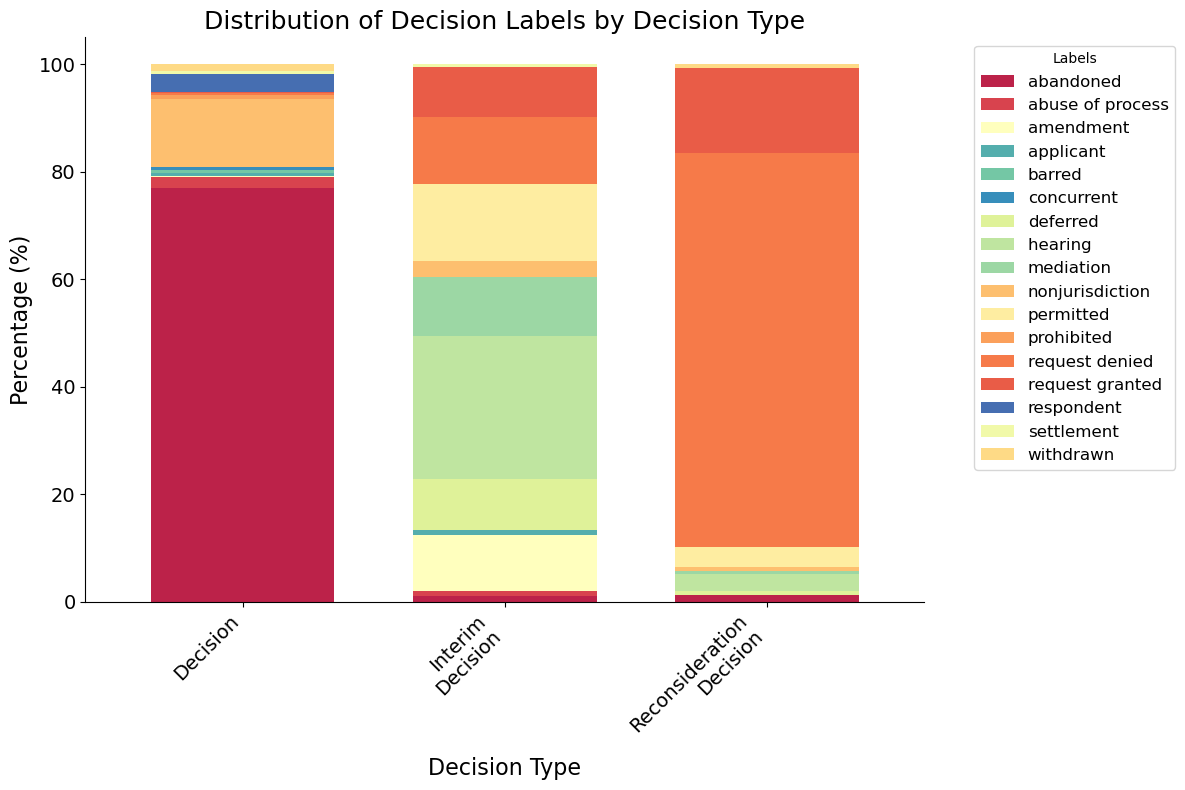

In [17]:
# 3.17 Plot Distribution of Decision Labels by Decision Type
# Define the color palette for consistency
color_palette = sns.color_palette("Spectral", n_colors=len(df['labels'].unique()))
color_mapping = dict(zip(df['labels'].unique(), color_palette))

# Filter to exclude specific decision types
filtered_df = df[~df['decisionType'].isin(['DECISION ON REMEDY', 'POST JUDGEMENT DECISION'])].copy()

# Update decision type labels
filtered_df.loc[:, 'decisionType'] = filtered_df['decisionType'].replace({
    'DECISION': 'Decision',
    'INTERIM DECISION': 'Interim\nDecision',
    'RECONSIDERATION DECISION': 'Reconsideration\nDecision'
})

# Cross-tabulation of decisionType and labels
crosstab_df = pd.crosstab(filtered_df['decisionType'], filtered_df['labels'], normalize='index') * 100

# Plot stacked bar chart
fig, ax = plt.subplots(figsize=(12, 8))
crosstab_df.plot(kind='bar', stacked=True, ax=ax, width=0.7, color=[color_mapping.get(x) for x in crosstab_df.columns], edgecolor='none')

# Enhancements
plt.title('Distribution of Decision Labels by Decision Type', fontsize=18)
plt.xlabel('Decision Type', fontsize=16)
plt.ylabel('Percentage (%)', fontsize=16)
plt.xticks(rotation=45, ha='right', fontsize=14)
plt.yticks(fontsize=14)
plt.legend(title='Labels', bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=12)

# Remove spines
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Adjust layout
plt.tight_layout()
plt.show()